In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('apple_quality.csv')
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [5]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [6]:
df['Quality'].replace({'good':0, 'bad':1},inplace = True)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,1
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,0
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,1
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,0


In [7]:
x = df.drop('Quality',axis = 1)
y = df['Quality']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2, stratify=y)

In [8]:
knn_clf = KNeighborsClassifier(n_neighbors=4,p=2)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
knn_clf.score(x_train, y_train)

0.734375

In [10]:
knn_clf.score(x_test, y_test)

0.545

### Model Evaluation

In [11]:
# Training Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1409  194]
 [ 656  941]]
**************************************************
Accuracy : 0.734375
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.88      0.77      1603
           1       0.83      0.59      0.69      1597

    accuracy                           0.73      3200
   macro avg       0.76      0.73      0.73      3200
weighted avg       0.76      0.73      0.73      3200



In [12]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[278 123]
 [241 158]]
**************************************************
Accuracy : 0.545
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.54      0.69      0.60       401
           1       0.56      0.40      0.46       399

    accuracy                           0.55       800
   macro avg       0.55      0.54      0.53       800
weighted avg       0.55      0.55      0.53       800



### Best K-Value

Text(0, 0.5, 'Accuracy')

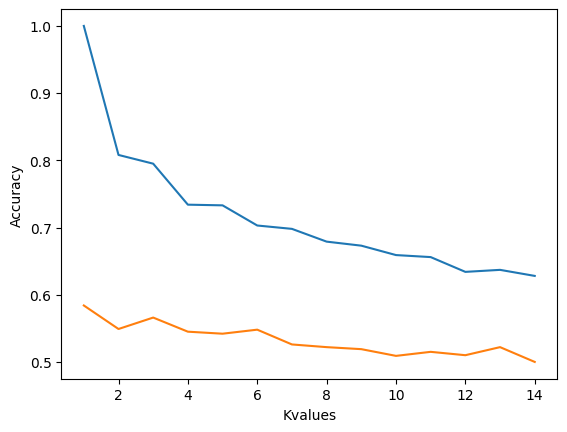

In [13]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2)
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

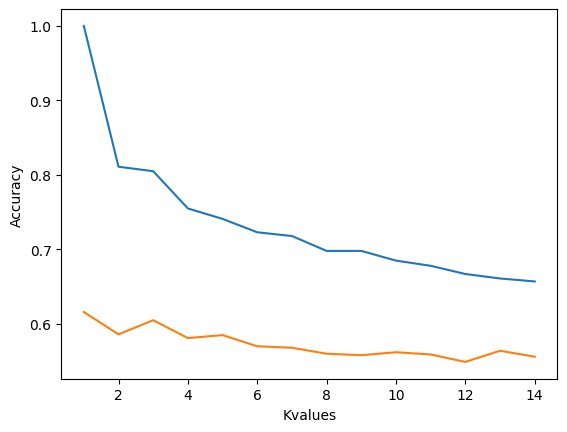

In [14]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1) # Manhattan Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")